In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\Nischal\Desktop\BioVid_data_processing\Graph\sample.csv")
a=df["SUM_AU_r"]
a

0      5.20
1      5.51
2      5.49
3      5.40
4      5.60
       ... 
746    3.92
747    4.38
748    5.44
749    6.03
750    6.85
Name: SUM_AU_r, Length: 751, dtype: float64

In [4]:
AU_sum=a


In [5]:
b=a[300:]
b.mean()

6.039623059866962

Pain 1 Upper: 6.858448655155239
Pain 2 Upper: 7.511978468639286
Pain 3 Upper: 9.5308146345487535
Pain 4 Upper:

In [12]:
no_pain_UL= 5.55
Low_pain_UL= 7.511978468639286



def Pain_labeler(x_data, num_steps=100):
    """ Sliding window for calculating pain levels """
    # Prepare the list for the transformed data

    start_ix=0
    end_ix=num_steps
    
    Word_Label=[]
    
    # For the first sequence of frames: ########################################
    seq_X = x_data[start_ix:end_ix]
    one_second_value=seq_X.mean()
    
    if one_second_value<= no_pain_UL:
        Word_Label.append("No Pain")
    elif one_second_value >no_pain_UL and one_second_value<Low_pain_UL:
        Word_Label.append("Low Pain Level")
    elif one_second_value >Low_pain_UL:
        Word_Label.append("High Pain Level")
    ############################################################################

    # Loop of the entire data set (apart from the first sequence)
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        start_ix= start_ix + num_steps
        end_ix = end_ix + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[start_ix:end_ix]
        one_second_value=seq_X.mean()
        if one_second_value<= no_pain_UL:
            Word_Label.append("No Pain")
        elif one_second_value >no_pain_UL and one_second_value<Low_pain_UL:
            Word_Label.append("Low Pain Level")
        elif one_second_value >Low_pain_UL:
            Word_Label.append("High Pain Level") 

    return Word_Label

In [13]:
file=Pain_labeler(a)

In [14]:
file

['High Pain Level',
 'High Pain Level',
 'High Pain Level',
 'Low Pain Level',
 'Low Pain Level',
 'Low Pain Level',
 'No Pain']

In [15]:
len(file)

7

Pain levels: 4,4,2,1,1


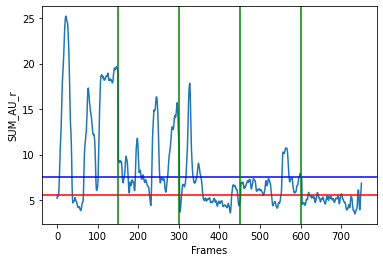

In [16]:
plt.plot(AU_sum)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('SUM_AU_r')
plt.xlabel('Frames')
plt.axhline(y=no_pain_UL, color='r', linestyle='-')
plt.axhline(y=Low_pain_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
print('Pain levels: 4,4,2,1,1')

In [17]:
file

['High Pain Level',
 'High Pain Level',
 'High Pain Level',
 'Low Pain Level',
 'Low Pain Level',
 'Low Pain Level',
 'No Pain']

In [18]:
count_np=0
count_lp=0
count_hp=0
for level in file:
    if level=='No Pain':
        count_np+=1
    if level=='Low Pain Level':
        count_lp+=1
    if level=='High Pain Level':
        count_hp+=1
print("The sliding window counter:    ")
print("No Pain count is:   ",count_np)
print("Low Pain count is:  ",count_lp)
print("High Pain count is: ",count_hp)

The sliding window counter:    
No Pain count is:    1
Low Pain count is:   3
High Pain count is:  3


In [19]:
# b=df["PSPI_score"]

Pain levels: 4,4,2,1,1


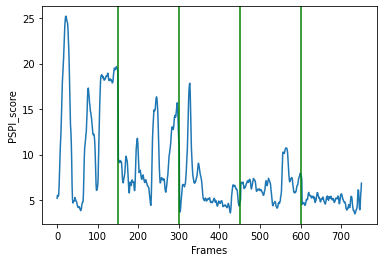

In [21]:
plt.plot(a)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_score')
plt.xlabel('Frames')
# plt.axhline(y=no_pain_UL, color='r', linestyle='-')
# plt.axhline(y=low_pain_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
# plt.legend()
print('Pain levels: 4,4,2,1,1')